In [19]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [20]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [21]:
def img_load(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [22]:
main_img = img_load('profile_pic.jpg')
style_img = img_load('monet2.jpg')

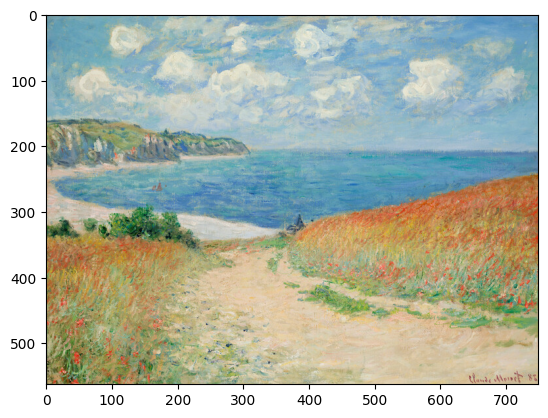

In [23]:
plt.imshow(np.squeeze(style_img))
plt.show()

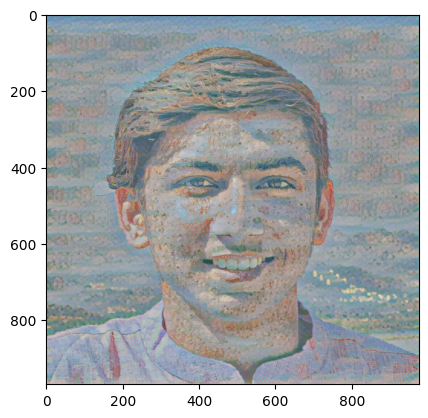

In [24]:
out_img = model(tf.constant(main_img), tf.constant(style_img))[0]
plt.imshow(np.squeeze(out_img))
plt.show()

In [25]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(out_img)*255, cv2.COLOR_BGR2RGB))

True